<h1> Problem

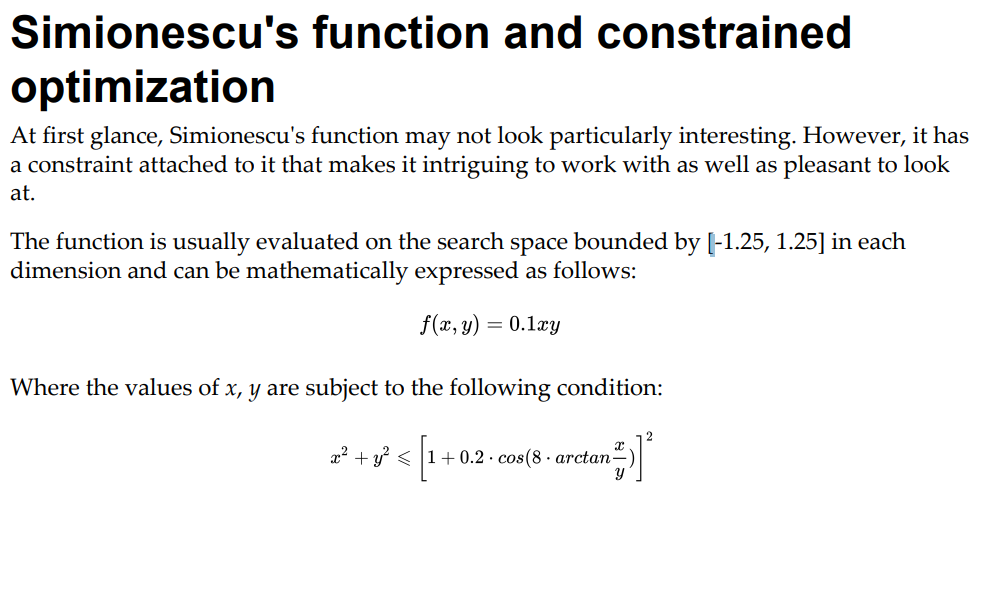

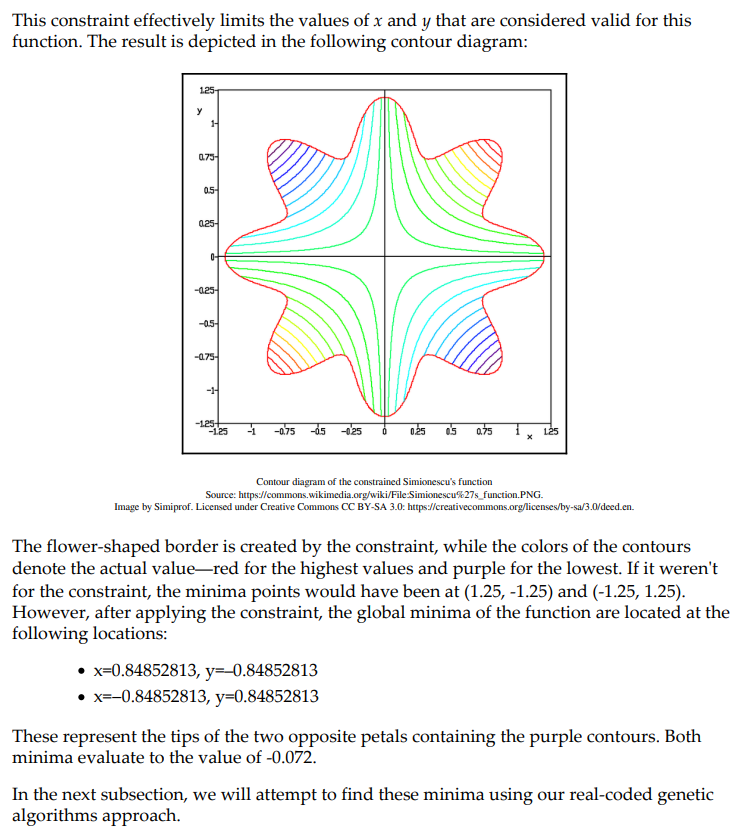

In [1]:
!pip install deap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 160 kB 5.1 MB/s 


<h1> Solving the problem

In [2]:
# For this problem we are limitated because the constraints, in this case we will use the ( DEAP tools ) to help us

In [3]:
from deap import creator, base, tools, algorithms
import random
import numpy as np


# STRUCTURE
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("ChromosomeStruct", list, fitness=creator.FitnessMin)
toolbox = base.Toolbox()


# GENE, CHROMOSOME, INDIVIDUAL, POPULATION
CHROMOSOME_LENGTH = 2 # Dimensions of variables
BOUND_LOW, BOUND_UP = -1.25, 1.25 # Defining the limits of function domain
def gene(l,u):
  return random.uniform(l,u)
toolbox.register("Gene", gene, l=BOUND_LOW, u=BOUND_UP)
toolbox.register("Chromosome", tools.initRepeat, creator.ChromosomeStruct, toolbox.Gene, n=CHROMOSOME_LENGTH)
toolbox.register("Individuo", toolbox.Chromosome)
toolbox.register("PopulationCreator", tools.initRepeat, list, toolbox.Individuo)


# GENETIC OPERATORS 
ETA = 30 
PENALTY_VALUE = 10
def fitness_function(solution):
  fitness = 0.1*solution[0]*solution[1]
  return fitness,
def constraints(solution): # This function has the responsibility to penalize the fitness scores of individuals out range the constraints
  from math import cos, atan
  x = solution[0]
  y = solution[1]
  boolean = x**2 + y**2 <= (1 + 0.2*cos(8*atan(x/y)))**2
  return boolean
toolbox.register("evaluate", fitness_function)
toolbox.decorate("evaluate", tools.DeltaPenality(constraints, PENALTY_VALUE)) # Applying restrictions
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxSimulatedBinaryBounded, eta=ETA, low=BOUND_LOW, up=BOUND_UP)
toolbox.register("mutate", tools.mutPolynomialBounded, eta=ETA, low=BOUND_LOW, up=BOUND_UP, indpb=3/CHROMOSOME_LENGTH)

  
# STORING THE INFORMATION
stats = tools.Statistics(lambda population: population.fitness.values)
stats.register("max", np.max)
stats.register("min", np.min)
stats.register("mean", np.mean)
hof = tools.HallOfFame(100)


# CONTROL PANEL
POPULATION_SIZE = 1000
PROBABILITY_CROSSOVER = 0.1
PROBABILITY_MUTATION = 0.5
MAX_GENERATIONS = 100 # (stopping condition)
#random.seed(42)


# EVOLVING THE SOLUTION
generationCounter = 0
population = toolbox.PopulationCreator(n=POPULATION_SIZE)
result, logbook = algorithms.eaSimple(population,
                                      toolbox,
                                      cxpb=PROBABILITY_CROSSOVER,
                                      mutpb=PROBABILITY_MUTATION,
                                      ngen=MAX_GENERATIONS,
                                      stats=stats,
                                      halloffame=hof,
                                      verbose=True)

gen	nevals	max	min       	mean   
0  	1000  	10 	-0.0678955	4.96015
1  	579   	10 	-0.0678955	1.85475
2  	570   	10 	-0.0704168	0.532272
3  	573   	10 	-0.0704168	0.730378
4  	526   	10 	-0.0704168	1.06259 
5  	550   	10 	-0.0713441	1.66721 
6  	552   	10 	-0.0718446	1.93519 
7  	558   	10 	-0.0717361	2.43602 
8  	551   	10 	-0.0717361	2.35409 
9  	533   	10 	-0.071703 	2.37294 
10 	543   	10 	-0.071703 	2.61384 
11 	554   	10 	-0.071703 	3.09596 
12 	565   	10 	-0.071703 	3.03528 
13 	520   	10 	-0.071703 	2.83392 
14 	582   	10 	-0.0718726	3.2368  
15 	579   	10 	-0.071974 	3.22639 
16 	518   	10 	-0.071974 	2.92439 
17 	556   	10 	-0.0718001	3.155   
18 	569   	10 	-0.0718001	3.12489 
19 	574   	10 	-0.0719461	3.38649 
20 	552   	10 	-0.0719461	3.35651 
21 	566   	10 	-0.0719461	3.135   
22 	559   	10 	-0.0719461	3.15504 
23 	566   	10 	-0.0719461	3.36594 
24 	550   	10 	-0.0719461	3.12458 
25 	561   	10 	-0.0719694	3.46644 
26 	566   	10 	-0.0719694	3.12439 
27 	568   	10 	-0.07199

<h1> Plotting the results

In [4]:
def plotSolutions(solutions):
  import matplotlib.pyplot as plt
  import numpy as np
  global bests_solutions
  plt.figure(figsize=(13,13))
  #plt.scatter(*zip(*bests_solutions), marker="x", color="red")
  plt.scatter(*zip(*solutions), marker="o", color="blue")
  plt.xticks(np.linspace(-1.25,1.25,10))
  plt.yticks(np.linspace(-1.25,1.25,10))
  plt.show()


#solutions = [[1, 3], [2,4]]
#plotSolutions(solutions)

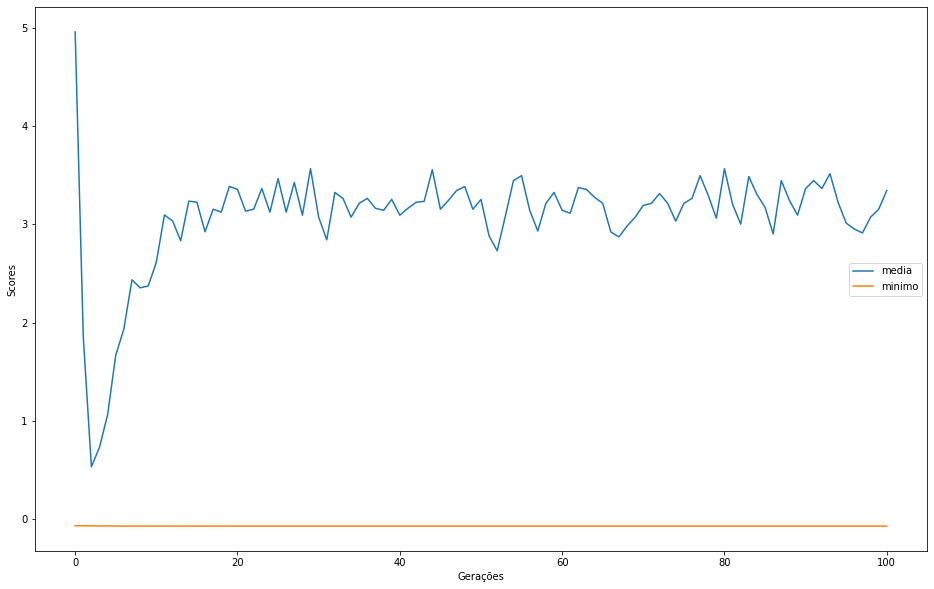

In [5]:
import matplotlib.pyplot as plt

# taking data
y_min = logbook.select("min")
y_mean = logbook.select("mean")
x_gen = logbook.select("gen")


#plotting
plt.figure(figsize=(16,  10))
plt.plot(x_gen, y_mean, label="media")
plt.plot(x_gen, y_min, label="minimo")
#plt.plot(x_gen, y_max, label="maximo")


plt.xlabel("Gerações")
plt.ylabel("Scores")
plt.legend(loc=5)
plt.show()

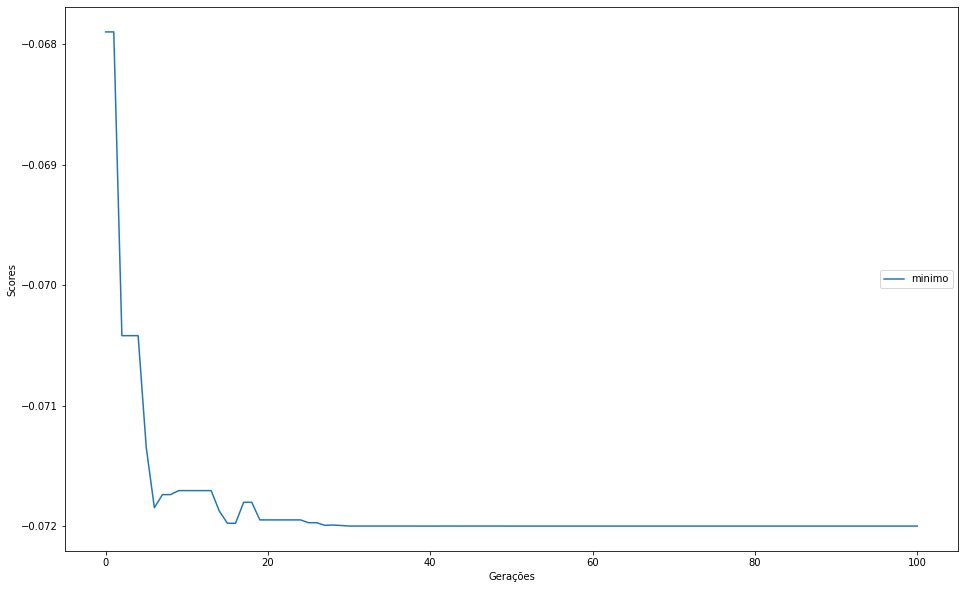

In [6]:
import matplotlib.pyplot as plt

# taking data
y_min = logbook.select("min")
y_mean = logbook.select("mean")
x_gen = logbook.select("gen")


#plotting
plt.figure(figsize=(16,  10))
#plt.plot(x_gen, y_mean, label="media")
plt.plot(x_gen, y_min, label="minimo")
#plt.plot(x_gen, y_max, label="maximo")


plt.xlabel("Gerações")
plt.ylabel("Scores")
plt.legend(loc=5)
plt.show()

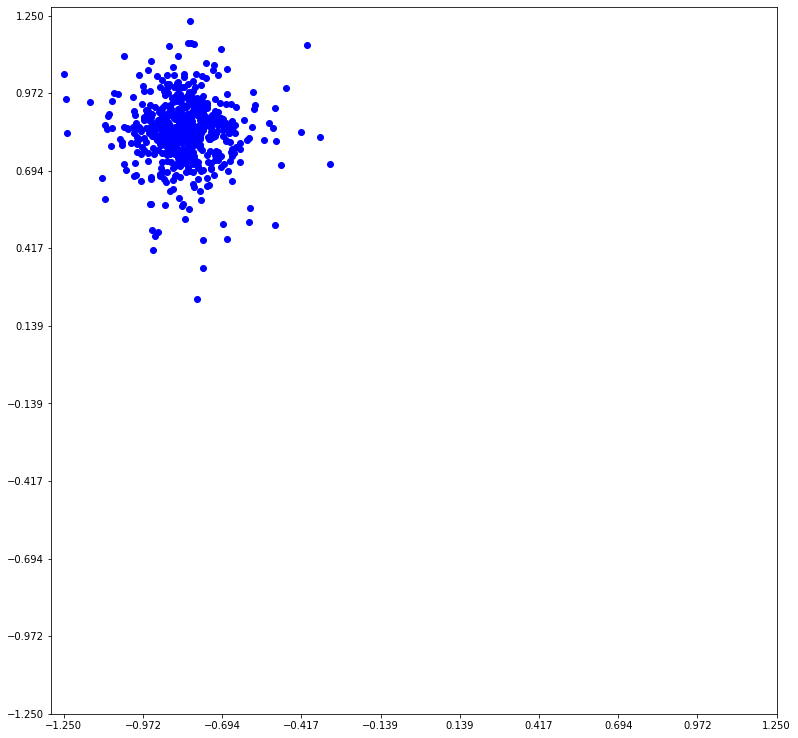

In [7]:
plotSolutions(result)

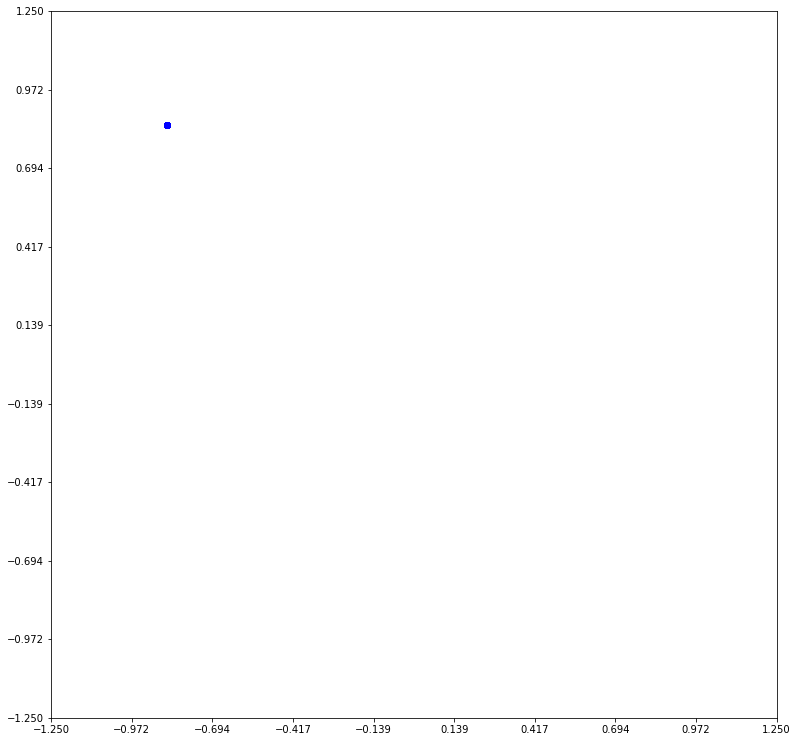

In [8]:
plotSolutions(hof)

In [9]:
print(hof[0])

[-0.8499208443847753, 0.847107935039987]


<h1> Trying to get the both minimal locals: Using parallel niching and elitism

In [16]:
from deap import tools
from deap import algorithms

def eaSimpleWithElitism(population, toolbox, cxpb, mutpb, ngen, stats=None,
             halloffame=None, verbose=__debug__):
    """This algorithm is similar to DEAP eaSimple() algorithm, with the modification that
    halloffame is used to implement an elitism mechanism. The individuals contained in the
    halloffame are directly injected into the next generation and are not subject to the
    genetic operators of selection, crossover and mutation.
    """
    logbook = tools.Logbook()
    logbook.header = ['gen', 'nevals'] + (stats.fields if stats else [])

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in population if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    if halloffame is None:
        raise ValueError("halloffame parameter must not be empty!")

    halloffame.update(population)
    hof_size = len(halloffame.items) if halloffame.items else 0

    record = stats.compile(population) if stats else {}
    logbook.record(gen=0, nevals=len(invalid_ind), **record)
    if verbose:
        print(logbook.stream)

    # Begin the generational process
    for gen in range(1, ngen + 1):

        # Select the next generation individuals
        offspring = toolbox.select(population, len(population) - hof_size)

        # Vary the pool of individuals
        offspring = algorithms.varAnd(offspring, toolbox, cxpb, mutpb)

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # add the best back to population:
        offspring.extend(halloffame.items)

        # Update the hall of fame with the generated individuals
        halloffame.update(offspring)

        # Replace the current population by the offspring
        population[:] = offspring

        # Append the current generation statistics to the logbook
        record = stats.compile(population) if stats else {}
        logbook.record(gen=gen, nevals=len(invalid_ind), **record)
        if verbose:
            print(logbook.stream)

    return population, logbook

In [17]:
# Creating a new selector

def selTournamentWithSharing(individuals, k, tournsize, DISTANCE_LIMIT, SHARING_EXTENT,  fit_attr='fitness'):
  from math import sqrt
  from deap import tools

  # Original fitness scores
  origFitness = [i.fitness.values[0] for i in individuals]

  # Changing the fitness scores based on nearby individuals
  for i in range(len(individuals)):
    sharingSum = 1
    x = individuals[i][0]
    y = individuals[i][1]
    for j in range(len(individuals)):
      if i != j:
        x2 = individuals[j][0]
        y2 = individuals[j][1]
        distance = sqrt((x-x2)**2 + (y-y2)**2)
        if distance < DISTANCE_LIMIT:
          sharingSum += (1-distance/(DISTANCE_LIMIT*SHARING_EXTENT))

    individuals[i].fitness.values = origFitness[i]/sharingSum,


  # Selecting individuals for the next generations
  selected = tools.selTournament(individuals, k, tournsize, fit_attr)


  # Returning the original fitness
  for i, ind in enumerate(individuals):
    ind.fitness.values = origFitness[i],
  
  return selected

In [18]:
from deap import creator, base, tools, algorithms
import random
import numpy as np


# STRUCTURE
creator.create("FitnessMin", base.Fitness, weights=(1.0,))
creator.create("ChromosomeStruct", list, fitness=creator.FitnessMin)
toolbox = base.Toolbox()


# GENE, CHROMOSOME, INDIVIDUAL, POPULATION
CHROMOSOME_LENGTH = 2 # Dimensions of variables
BOUND_LOW, BOUND_UP = -1.25, 1.25 # Defining the limits of function domain
def gene(l,u):
  return random.uniform(l,u)
toolbox.register("Gene", gene, l=BOUND_LOW, u=BOUND_UP)
toolbox.register("Chromosome", tools.initRepeat, creator.ChromosomeStruct, toolbox.Gene, n=CHROMOSOME_LENGTH)
toolbox.register("Individuo", toolbox.Chromosome)
toolbox.register("PopulationCreator", tools.initRepeat, list, toolbox.Individuo)


# GENETIC OPERATORS ( FITNESS FUNCTION )
ETA = 30 
PENALTY_VALUE = 10
def fitness_function(solution):
  fitness = 0.1*solution[0]*solution[1]
  return 10 - fitness,
def constraints(solution): # This function has the responsibility to penalize the fitness scores of individuals out range the constraints
  from math import cos, atan
  x = solution[0]
  y = solution[1]
  boolean = x**2 + y**2 <= (1 + 0.2*cos(8*atan(x/y)))**2
  return boolean
toolbox.register("evaluate", fitness_function)
toolbox.decorate("evaluate", tools.DeltaPenality(constraints, PENALTY_VALUE)) # Applying restrictions


# GENETIC OPERATORS ( OTHERS )
DISTANCE_LIMIT = 0.1
SHARING_EXTENT = 10
toolbox.register("select", selTournamentWithSharing, tournsize=3, DISTANCE_LIMIT=DISTANCE_LIMIT, SHARING_EXTENT=SHARING_EXTENT)
toolbox.register("mate", tools.cxSimulatedBinaryBounded, eta=ETA, low=BOUND_LOW, up=BOUND_UP)
toolbox.register("mutate", tools.mutPolynomialBounded, eta=ETA, low=BOUND_LOW, up=BOUND_UP, indpb=3/CHROMOSOME_LENGTH)

  
# STORING THE INFORMATION
stats = tools.Statistics(lambda population: population.fitness.values)
stats.register("max", np.max)
stats.register("min", np.min)
stats.register("mean", np.mean)
hof = tools.HallOfFame(50)


# CONTROL PANEL
POPULATION_SIZE = 1000
PROBABILITY_CROSSOVER = 0.1
PROBABILITY_MUTATION = 0.5
MAX_GENERATIONS = 100 # (stopping condition)
#random.seed(42)


# EVOLVING THE SOLUTION
generationCounter = 0
population = toolbox.PopulationCreator(n=POPULATION_SIZE)
result, logbook = eaSimpleWithElitism(population,
                                      toolbox,
                                      cxpb=PROBABILITY_CROSSOVER,
                                      mutpb=PROBABILITY_MUTATION,
                                      ngen=MAX_GENERATIONS,
                                      stats=stats,
                                      halloffame=hof,
                                      verbose=True)

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'ChromosomeStruct' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


gen	nevals	max    	min    	mean   
0  	1000  	10.0697	9.92943	9.99999
1  	529   	10.0697	9.9295 	10.0033
2  	550   	10.0697	9.9295 	10.0014
3  	529   	10.0709	9.93078	10.0021
4  	562   	10.0709	9.92916	10.002 
5  	528   	10.0709	9.93096	10.0025
6  	508   	10.0709	9.93096	10.0026
7  	539   	10.0709	9.93006	10.003 
8  	509   	10.0709	9.93006	10.0011
9  	516   	10.0709	9.93836	10.0028
10 	510   	10.0709	9.93668	10.0015
11 	546   	10.0709	9.93077	10.0027
12 	520   	10.0709	9.93077	10.0027
13 	517   	10.0709	9.93582	10.003 
14 	489   	10.0709	9.93421	10.0023
15 	534   	10.0709	9.92854	10.0036
16 	526   	10.0709	9.93376	10.0025
17 	514   	10.0709	9.93583	10.002 
18 	534   	10.0709	9.92999	10.0026
19 	544   	10.0709	9.92999	10.0027
20 	505   	10.0709	9.92999	10.0025
21 	512   	10.0709	9.93349	10.0028
22 	503   	10.0709	9.93349	10.0021
23 	508   	10.0709	9.93349	10.0033
24 	526   	10.0709	9.93197	10.0035
25 	482   	10.0709	9.92808	10.0027
26 	514   	10.0709	9.92808	10.0015
27 	522   	10.0709	9

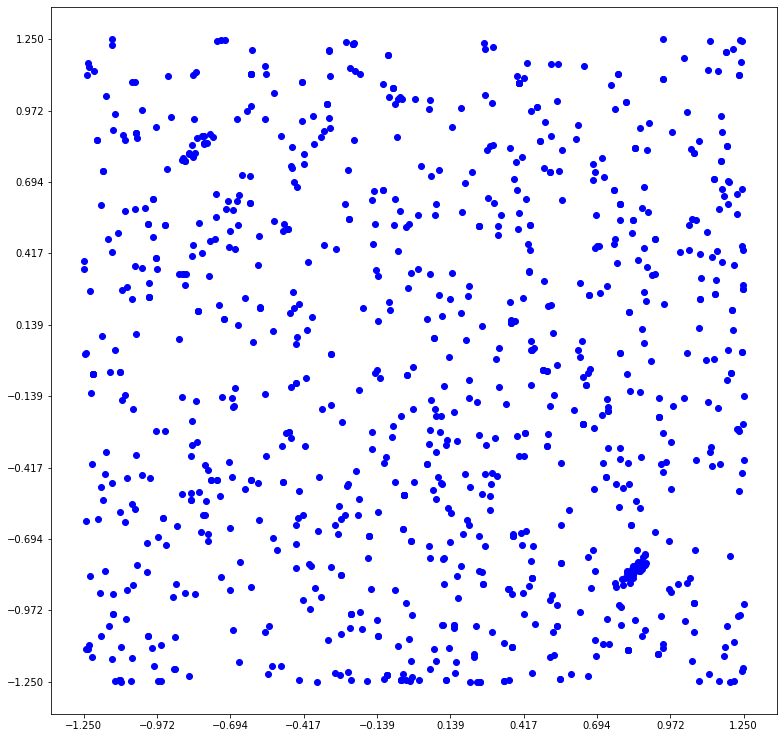

In [19]:
plotSolutions(result)

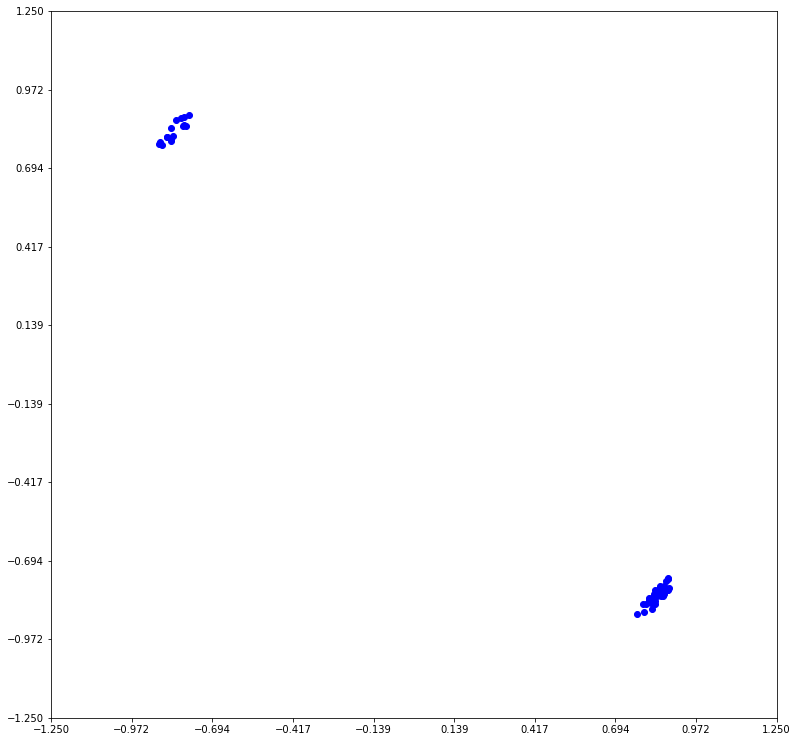

In [20]:
plotSolutions(hof)

In [21]:
for i in range(2):
  print(hof[i])

[0.8212102651947599, -0.8641349722095053]
[-0.8197453381176578, 0.8645644803693056]


<h1> Trying to get the both minimal locals: Using serial niching and elitism

In [26]:
from deap import creator, base, tools, algorithms
import random
import numpy as np


BLACK_LIST = []
SERIAL_NICHING_RUNS = 10
for _ in range(SERIAL_NICHING_RUNS):
  # STRUCTURE
  creator.create("FitnessMin", base.Fitness, weights=(1.0,))
  creator.create("ChromosomeStruct", list, fitness=creator.FitnessMin)
  toolbox = base.Toolbox()


  # GENE, CHROMOSOME, INDIVIDUAL, POPULATION
  CHROMOSOME_LENGTH = 2 # Dimensions of variables
  BOUND_LOW, BOUND_UP = -1.25, 1.25 # Defining the limits of function domain
  def gene(l,u):
    return random.uniform(l,u)
  toolbox.register("Gene", gene, l=BOUND_LOW, u=BOUND_UP)
  toolbox.register("Chromosome", tools.initRepeat, creator.ChromosomeStruct, toolbox.Gene, n=CHROMOSOME_LENGTH)
  toolbox.register("Individuo", toolbox.Chromosome)
  toolbox.register("PopulationCreator", tools.initRepeat, list, toolbox.Individuo)


  # GENETIC OPERATORS ( FITNESS FUNCTION )
  ETA = 30
  DISTANCE_LIMIT = 0.05
  PENALTY_VALUE = 10
  def fitness_function(solution):
    fitness = 0.1*solution[0]*solution[1]
    return 10 - fitness,
  def constraints(solution): # This function has the responsibility to penalize the fitness scores of individuals out range the constraints
    from math import cos, atan, sqrt
    global BLACK_LIST, DISTANCE_LIMIT
    x = solution[0]
    y = solution[1]
    boolean = x**2 + y**2 <= (1 + 0.2*cos(8*atan(x/y)))**2
    for i in BLACK_LIST:
      distance = sqrt((x-i[0])**2 + (y-i[1])**2) < DISTANCE_LIMIT
      if distance:
        return False
    return boolean
  toolbox.register("evaluate", fitness_function)
  toolbox.decorate("evaluate", tools.DeltaPenality(constraints, PENALTY_VALUE)) # Applying restrictions


  # GENETIC OPERATORS ( OTHERS )
  toolbox.register("select", tools.selTournament, tournsize=3)
  toolbox.register("mate", tools.cxSimulatedBinaryBounded, eta=ETA, low=BOUND_LOW, up=BOUND_UP)
  toolbox.register("mutate", tools.mutPolynomialBounded, eta=ETA, low=BOUND_LOW, up=BOUND_UP, indpb=3/CHROMOSOME_LENGTH)

    
  # STORING THE INFORMATION
  stats = tools.Statistics(lambda population: population.fitness.values)
  stats.register("max", np.max)
  stats.register("min", np.min)
  stats.register("mean", np.mean)
  hof = tools.HallOfFame(10)


  # CONTROL PANEL
  POPULATION_SIZE = 100
  PROBABILITY_CROSSOVER = 0.1
  PROBABILITY_MUTATION = 0.5
  MAX_GENERATIONS = 100 # (stopping condition)
  #random.seed(42)


  # EVOLVING THE SOLUTION
  generationCounter = 0
  population = toolbox.PopulationCreator(n=POPULATION_SIZE)
  result, logbook = eaSimpleWithElitism(population,
                                        toolbox,
                                        cxpb=PROBABILITY_CROSSOVER,
                                        mutpb=PROBABILITY_MUTATION,
                                        ngen=MAX_GENERATIONS,
                                        stats=stats,
                                        halloffame=hof,
                                        verbose=True)
  for i in hof:
    BLACK_LIST.append(i)

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'ChromosomeStruct' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


gen	nevals	max    	min    	mean   
0  	100   	10.0632	9.93479	10.0003
1  	45    	10.0632	9.94376	10.0138
2  	50    	10.0708	10     	10.0295
3  	45    	10.0708	10     	10.0407
4  	46    	10.0708	10     	10.0439
5  	47    	10.0708	10     	10.0506
6  	46    	10.0708	10     	10.0509
7  	51    	10.0708	10     	10.0485
8  	41    	10.0708	10     	10.0545
9  	41    	10.0711	10     	10.0551
10 	58    	10.0711	10     	10.0427
11 	45    	10.0719	10     	10.0481
12 	52    	10.0719	10     	10.0498
13 	46    	10.0719	10     	10.0488
14 	51    	10.0719	10     	10.0478
15 	50    	10.0719	10     	10.0468
16 	46    	10.0719	10     	10.0476
17 	56    	10.0719	10     	10.0451
18 	53    	10.0719	10     	10.0455
19 	52    	10.0719	10     	10.0438
20 	51    	10.0719	10     	10.0416
21 	45    	10.0719	10     	10.049 
22 	52    	10.0719	10     	10.0497
23 	59    	10.0719	10     	10.044 
24 	41    	10.0719	10     	10.0494
25 	50    	10.0719	10     	10.0494
26 	53    	10.0719	10     	10.0478
27 	44    	10.0719	1

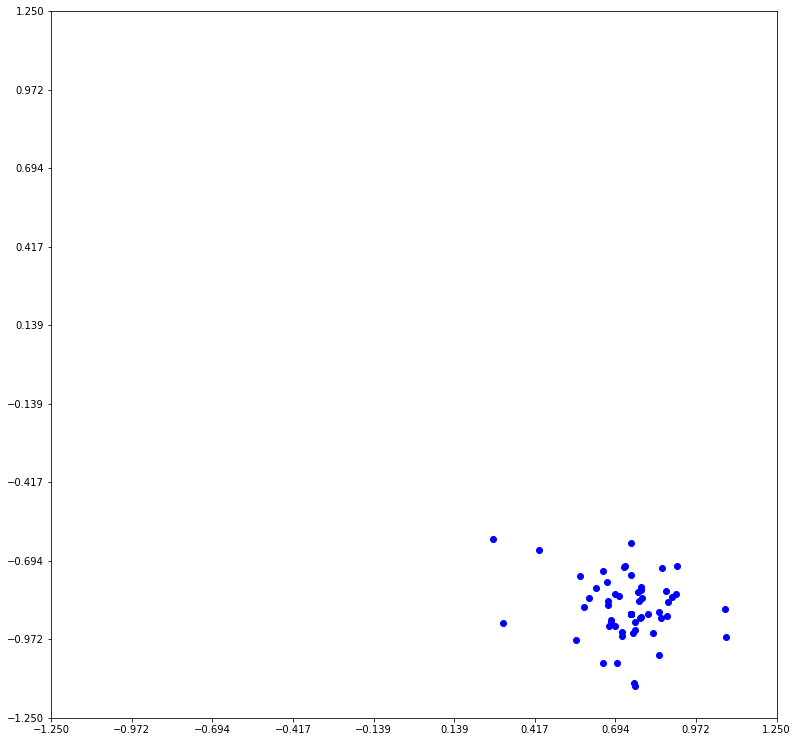

In [27]:
plotSolutions(result)

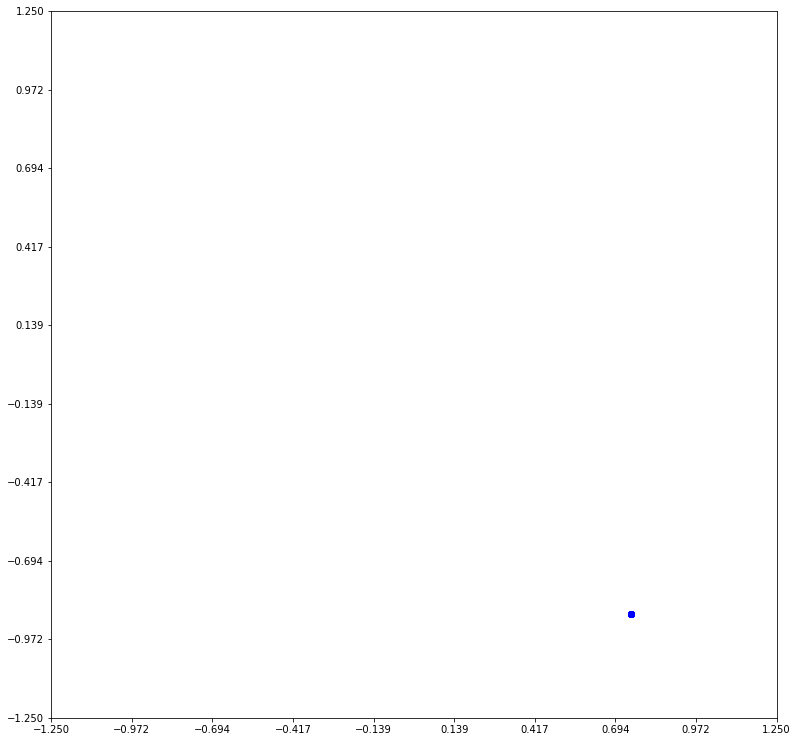

In [28]:
plotSolutions(hof)

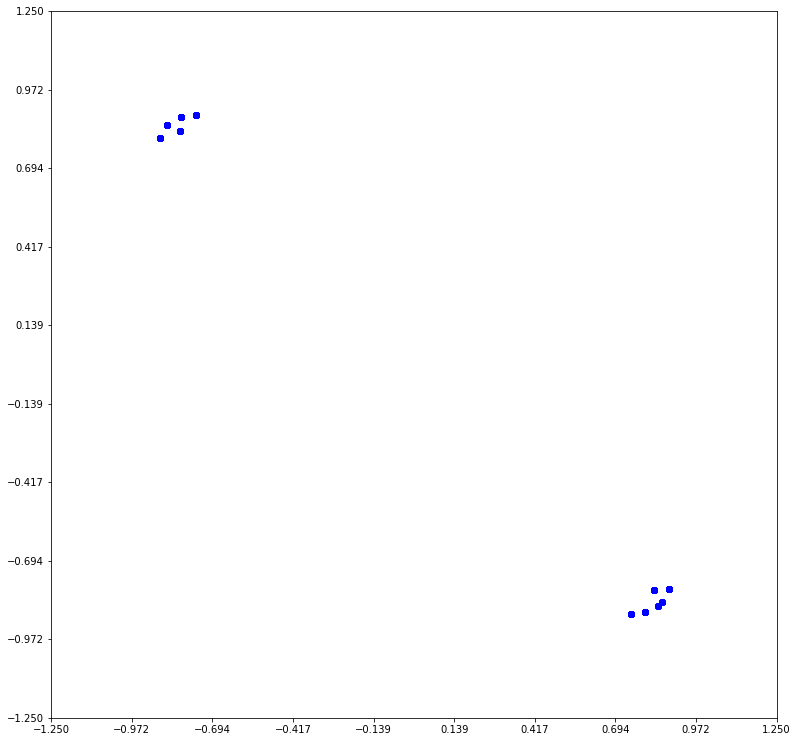

In [29]:
plotSolutions(BLACK_LIST)

<h1> Trying to get the both minimal locals: Using serial niching, parallel niching and elitism 

In [53]:
from deap import creator, base, tools, algorithms
import random
import numpy as np


BLACK_LIST = []
SERIAL_NICHING_RUNS = 10
for _ in range(SERIAL_NICHING_RUNS):
  # STRUCTURE
  creator.create("FitnessMin", base.Fitness, weights=(1.0,))
  creator.create("ChromosomeStruct", list, fitness=creator.FitnessMin)
  toolbox = base.Toolbox()


  # GENE, CHROMOSOME, INDIVIDUAL, POPULATION
  CHROMOSOME_LENGTH = 2 # Dimensions of variables
  BOUND_LOW, BOUND_UP = -1.25, 1.25 # Defining the limits of function domain
  def gene(l,u):
    return random.uniform(l,u)
  toolbox.register("Gene", gene, l=BOUND_LOW, u=BOUND_UP)
  toolbox.register("Chromosome", tools.initRepeat, creator.ChromosomeStruct, toolbox.Gene, n=CHROMOSOME_LENGTH)
  toolbox.register("Individuo", toolbox.Chromosome)
  toolbox.register("PopulationCreator", tools.initRepeat, list, toolbox.Individuo)


  # GENETIC OPERATORS ( FITNESS FUNCTION )
  ETA = 30
  DISTANCE_LIMIT = 0.05
  PENALTY_VALUE = 10
  def fitness_function(solution):
    fitness = 0.1*solution[0]*solution[1]
    return 10 - fitness,
  def constraints(solution): # This function has the responsibility to penalize the fitness scores of individuals out range the constraints
    from math import cos, atan, sqrt
    global BLACK_LIST, DISTANCE_LIMIT
    x = solution[0]
    y = solution[1]
    boolean = x**2 + y**2 <= (1 + 0.2*cos(8*atan(x/y)))**2
    for i in BLACK_LIST:
      distance = sqrt((x-i[0])**2 + (y-i[1])**2) < DISTANCE_LIMIT
      if distance:
        return False
    return boolean
  toolbox.register("evaluate", fitness_function)
  toolbox.decorate("evaluate", tools.DeltaPenality(constraints, PENALTY_VALUE)) # Applying restrictions


  # GENETIC OPERATORS ( OTHERS )
  SHARING_EXTENT=10
  toolbox.register("select", selTournamentWithSharing, tournsize=3, DISTANCE_LIMIT=DISTANCE_LIMIT, SHARING_EXTENT=SHARING_EXTENT)
  toolbox.register("mate", tools.cxSimulatedBinaryBounded, eta=ETA, low=BOUND_LOW, up=BOUND_UP)
  toolbox.register("mutate", tools.mutPolynomialBounded, eta=ETA, low=BOUND_LOW, up=BOUND_UP, indpb=3/CHROMOSOME_LENGTH)

    
  # STORING THE INFORMATION
  stats = tools.Statistics(lambda population: population.fitness.values)
  stats.register("max", np.max)
  stats.register("min", np.min)
  stats.register("mean", np.mean)
  hof = tools.HallOfFame(10)


  # CONTROL PANEL
  POPULATION_SIZE = 100
  PROBABILITY_CROSSOVER = 0.5
  PROBABILITY_MUTATION = 0.5
  MAX_GENERATIONS = 25 # (stopping condition)
  #random.seed(42)


  # EVOLVING THE SOLUTION
  generationCounter = 0
  population = toolbox.PopulationCreator(n=POPULATION_SIZE)
  result, logbook = eaSimpleWithElitism(population,
                                        toolbox,
                                        cxpb=PROBABILITY_CROSSOVER,
                                        mutpb=PROBABILITY_MUTATION,
                                        ngen=MAX_GENERATIONS,
                                        stats=stats,
                                        halloffame=hof,
                                        verbose=True)
  for i in hof:
    BLACK_LIST.append(i)

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'ChromosomeStruct' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


gen	nevals	max    	min    	mean   
0  	100   	10.0557	9.93322	9.99874
1  	71    	10.0582	9.97291	10.0118
2  	70    	10.0582	9.97766	10.012 
3  	66    	10.0618	9.9934 	10.0147
4  	68    	10.0618	9.95137	10.0144
5  	71    	10.0618	9.95887	10.0157
6  	64    	10.0644	9.94294	10.0126
7  	70    	10.0644	9.96408	10.0128
8  	57    	10.0644	9.96408	10.0143
9  	76    	10.0644	9.96525	10.0195
10 	69    	10.0644	9.94961	10.0159
11 	73    	10.0662	9.93626	10.0164
12 	57    	10.0662	9.93626	10.0195
13 	65    	10.0662	9.93626	10.0142
14 	68    	10.0662	9.94024	10.0173
15 	63    	10.0662	9.93879	10.0194
16 	61    	10.0662	9.9559 	10.0158
17 	58    	10.0662	9.9559 	10.0122
18 	67    	10.0662	9.95026	10.0136
19 	67    	10.0662	9.96418	10.0137
20 	70    	10.0662	9.95828	10.014 
21 	75    	10.0662	9.96124	10.0154
22 	70    	10.0662	9.95865	10.0184
23 	61    	10.0662	9.96169	10.0194
24 	67    	10.0667	9.95697	10.0202
25 	75    	10.0667	9.93604	10.0161
gen	nevals	max    	min    	mean   
0  	100   	10.0699	9

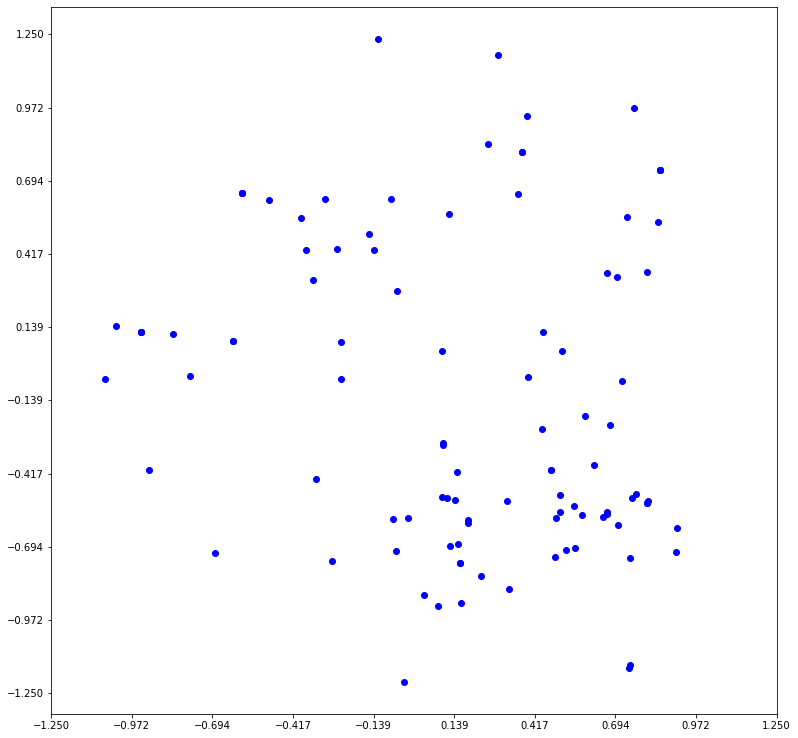

In [54]:
plotSolutions(result)

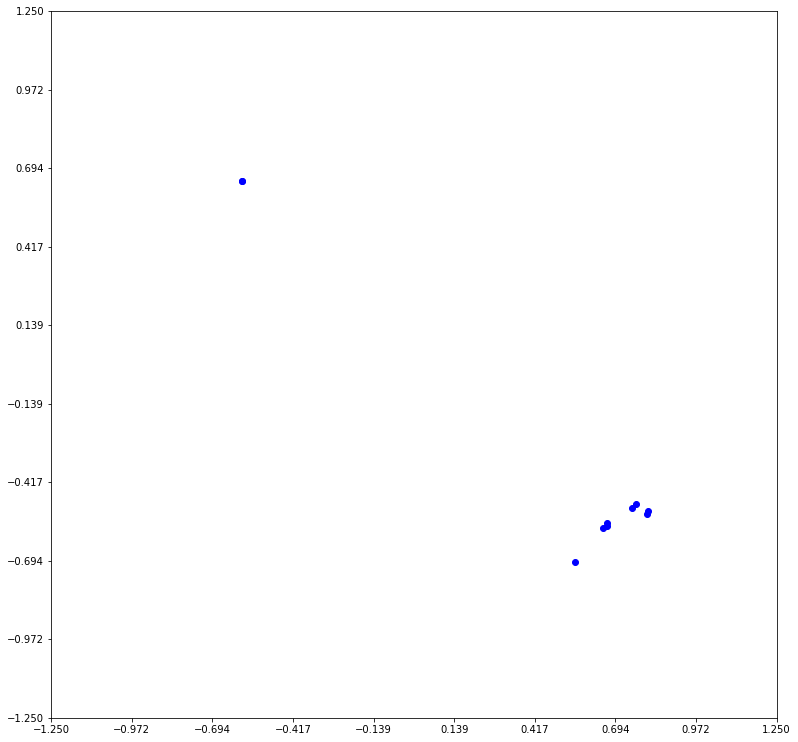

In [55]:
plotSolutions(hof)

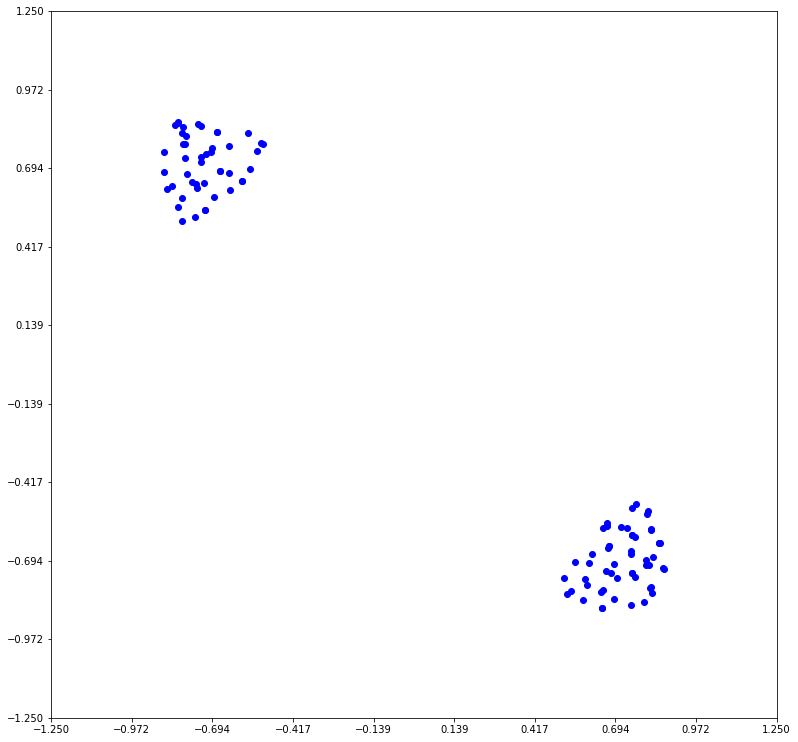

In [56]:
plotSolutions(BLACK_LIST)

<h1> To close with gold key we will do something that I called as "Solutions map"

In [73]:
from deap import creator, base, tools, algorithms
import random
import numpy as np


BLACK_LIST = []
SERIAL_NICHING_RUNS = 150
for _ in range(SERIAL_NICHING_RUNS):
  # STRUCTURE
  creator.create("FitnessMin", base.Fitness, weights=(1.0,))
  creator.create("ChromosomeStruct", list, fitness=creator.FitnessMin)
  toolbox = base.Toolbox()


  # GENE, CHROMOSOME, INDIVIDUAL, POPULATION
  CHROMOSOME_LENGTH = 2 # Dimensions of variables
  BOUND_LOW, BOUND_UP = -1.25, 1.25 # Defining the limits of function domain
  def gene(l,u):
    return random.uniform(l,u)
  toolbox.register("Gene", gene, l=BOUND_LOW, u=BOUND_UP)
  toolbox.register("Chromosome", tools.initRepeat, creator.ChromosomeStruct, toolbox.Gene, n=CHROMOSOME_LENGTH)
  toolbox.register("Individuo", toolbox.Chromosome)
  toolbox.register("PopulationCreator", tools.initRepeat, list, toolbox.Individuo)


  # GENETIC OPERATORS ( FITNESS FUNCTION )
  ETA = 30
  DISTANCE_LIMIT = 0.025
  PENALTY_VALUE = 10
  def fitness_function(solution):
    fitness = 0.1*solution[0]*solution[1]
    return 10 - fitness,
  def constraints(solution): # This function has the responsibility to penalize the fitness scores of individuals out range the constraints
    from math import cos, atan, sqrt
    global BLACK_LIST, DISTANCE_LIMIT
    x = solution[0]
    y = solution[1]
    boolean = x**2 + y**2 <= (1 + 0.2*cos(8*atan(x/y)))**2
    for i in BLACK_LIST:
      distance = sqrt((x-i[0])**2 + (y-i[1])**2) < DISTANCE_LIMIT
      if distance:
        return False
    return boolean
  toolbox.register("evaluate", fitness_function)
  toolbox.decorate("evaluate", tools.DeltaPenality(constraints, PENALTY_VALUE)) # Applying restrictions


  # GENETIC OPERATORS ( OTHERS )
  SHARING_EXTENT=10
  toolbox.register("select", selTournamentWithSharing, tournsize=3, DISTANCE_LIMIT=DISTANCE_LIMIT, SHARING_EXTENT=SHARING_EXTENT)
  toolbox.register("mate", tools.cxSimulatedBinaryBounded, eta=ETA, low=BOUND_LOW, up=BOUND_UP)
  toolbox.register("mutate", tools.mutPolynomialBounded, eta=ETA, low=BOUND_LOW, up=BOUND_UP, indpb=2/CHROMOSOME_LENGTH)

    
  # STORING THE INFORMATION
  stats = tools.Statistics(lambda population: population.fitness.values)
  stats.register("max", np.max)
  stats.register("min", np.min)
  stats.register("mean", np.mean)
  hof = tools.HallOfFame(10)


  # CONTROL PANEL
  POPULATION_SIZE = 50
  PROBABILITY_CROSSOVER = 0.5
  PROBABILITY_MUTATION = 0.5
  MAX_GENERATIONS = 20 # (stopping condition)
  #random.seed(42)


  # EVOLVING THE SOLUTION
  generationCounter = 0
  population = toolbox.PopulationCreator(n=POPULATION_SIZE)
  result, logbook = eaSimpleWithElitism(population,
                                        toolbox,
                                        cxpb=PROBABILITY_CROSSOVER,
                                        mutpb=PROBABILITY_MUTATION,
                                        ngen=MAX_GENERATIONS,
                                        stats=stats,
                                        halloffame=hof,
                                        verbose=True)
  for i in hof:
    BLACK_LIST.append(i)

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'ChromosomeStruct' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


gen	nevals	max    	min    	mean   
0  	50    	10.0432	9.95006	10.0002
1  	26    	10.0478	9.94541	10.0099
2  	29    	10.05  	9.97714	10.0121
3  	31    	10.0513	9.96659	10.0152
4  	35    	10.0545	9.97044	10.0203
5  	28    	10.0608	9.96756	10.0246
6  	33    	10.0608	9.95058	10.0197
7  	28    	10.0608	9.95583	10.0237
8  	31    	10.0675	9.94474	10.0252
9  	33    	10.0675	9.96504	10.0275
10 	27    	10.0675	9.99786	10.0325
11 	30    	10.0675	10     	10.0364
12 	27    	10.0675	9.99397	10.0324
13 	32    	10.0682	10     	10.0387
14 	31    	10.0716	10     	10.0393
15 	29    	10.0716	9.99687	10.0451
16 	28    	10.0716	9.99685	10.0427
17 	33    	10.0716	10     	10.039 
18 	31    	10.0716	10     	10.0368
19 	29    	10.0716	10     	10.0386
20 	25    	10.0716	10     	10.037 
gen	nevals	max    	min    	mean   
0  	50    	10.0404	9.94089	9.99912
1  	30    	10.0547	9.95747	10.0095
2  	30    	10.0606	9.95319	10.0111
3  	25    	10.0606	9.96975	10.0154
4  	33    	10.0606	9.94601	10.0155
5  	33    	10.0608	9

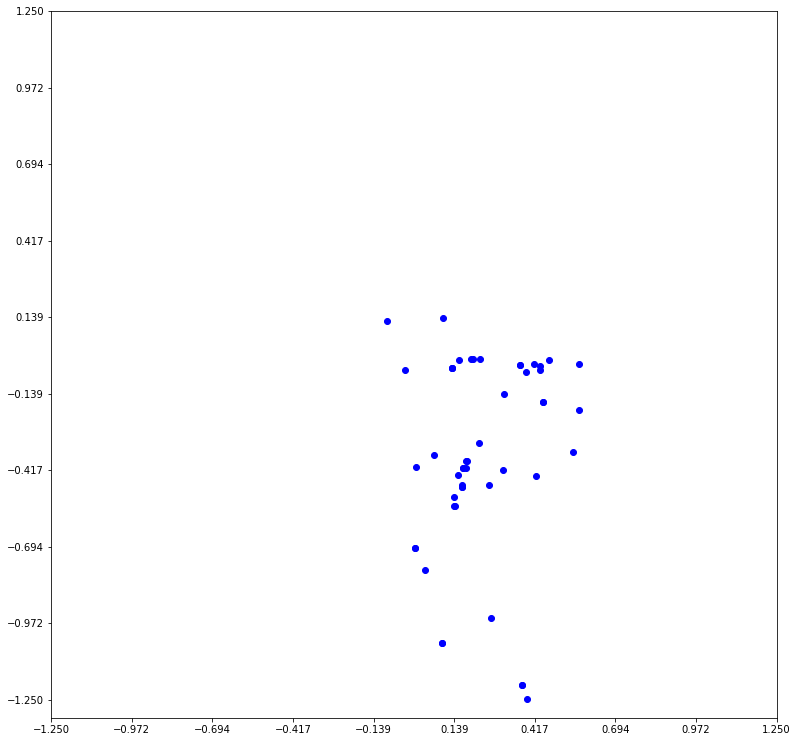

In [74]:
plotSolutions(result)

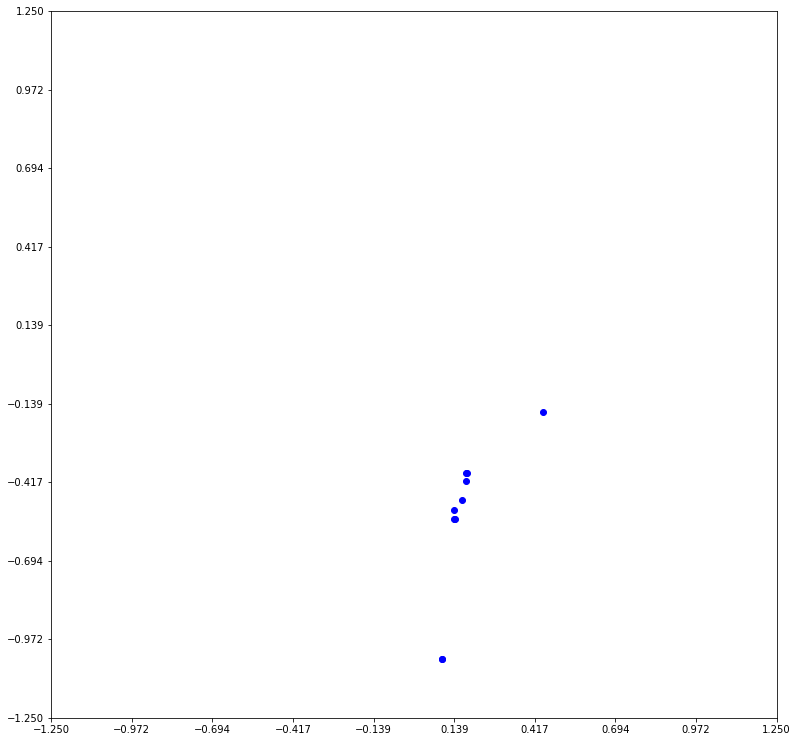

In [75]:
plotSolutions(hof)

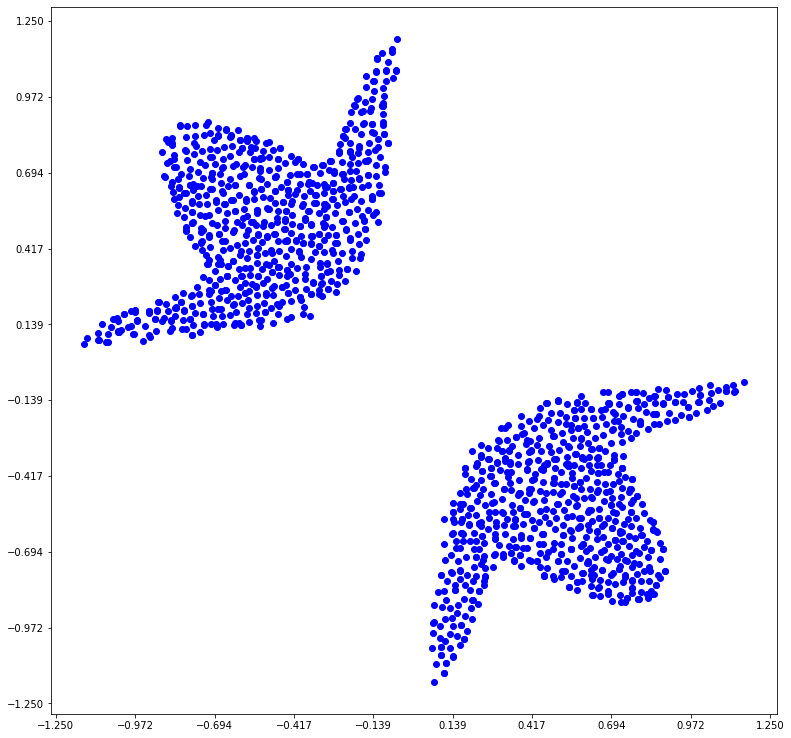

In [76]:
plotSolutions(BLACK_LIST)